# Final Project


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm
import sklearn.model_selection as skms
import sklearn.linear_model as sklm
import sklearn.tree as skt
import sklearn.ensemble as skens

## Introduction

### Assignment

In this final project you be analyzing a data set using techniques from Data Science 101. The goal of this project is to demonstrate your ability to apply the concepts you have learned in this course to a real-world data set. You will be graded on the quality of your analysis, the clarity of your code, and the effectiveness of your communication.

Each section will contain a brief description of the task, followed by a code cell where you will write your code. You should write your code in the code cell and run it to generate the output. You will need to interpret the results of your analysis in a way that is understandable to people without a background in statistics or Python programming You should use markdown to format your text in a legible way.

**Individual Effort Policy**: You may use any resources you like to complete this project, including the internet, textbooks, and discussions with other people. You may also use GenAI tools like Copilot or ChatGPT. It is expected that students will use GenAI tools for writing code, and no citation will be required for GenAI assisted code. For the written portions of the project, use of GenAI should be cited in a way that make clear how the GenAI tool was used. The *GenAI Appendix* section at the end provides a template you can use to indicate how you used tools like ChatGPT for each section. You should be prepared to explain any code or written responses that you submit upon request.

### Background

In this assignment, we will analyze two data sets from "Wolves and Moose of Isle Royale" project. The data sets contain information about the populations of wolves and moose on Isle Royale, an island in Lake Superior. The data sets include information about the number of wolves and moose on the island, as well as other variables that may be related to the populations of wolves and moose.

> Isle Royale is a remote wilderness island, isolated by the frigid waters of Lake Superior, and home to populations of wolves and moose. As predator and prey, their lives and deaths are linked in a drama that is timeless and historic. Their lives are historic because we have been documenting their lives for more than five decades. This research project is the longest continuous study of any predator-prey system in the world. ([Source](https://isleroyalewolf.org/overview/overview/at_a_glance.html))

You may find it helpful to read the most recent [Annual Report](https://isleroyalewolf.org/sites/default/files/annual-report-pdf/WolfMooseReport_2024_final-web.pdf) to learn more about the project.


## Data

The data for this project are contained in two CSV files:

In [2]:
wolf_moose_yearly = pd.read_csv("./wolf_moose_yearly.csv", na_values = ["NA", "N/A", "N/A yet", "NA yet"])
moose_deaths = pd.read_csv("./moose_deaths.csv")

The `wolf_moose_yearly` data set contains yearly counts of wolf and moose population, along with variables about the environment and other factors that may be related to the populations. The `moose_deaths` data set contains information about the age and size of decreased moose on Isle Royale.

**Task**: Report the number of rows and columns in each data set. Report the column names in each data set.

In [5]:

print(f"wolf_moose_yearly: {wolf_moose_yearly.shape[0]} rows, {wolf_moose_yearly.shape[1]} columns")
print(f"moose_deaths: {moose_deaths.shape[0]} rows, {moose_deaths.shape[1]} columns")


print("wolf_moose_yearly columns:", wolf_moose_yearly.columns)
print("moose_deaths columns:", moose_deaths.columns)

wolf_moose_yearly: 61 rows, 15 columns
moose_deaths: 662 rows, 8 columns
wolf_moose_yearly columns: Index(['year', 'wolves', 'moose', 'kill rate', 'predation rate',
       'moose recruitment rate', 'moose mean age excluding calves',
       'July-Sept (temp, F)', 'Apr-May (temp, F)', 'Jan-Feb (temp, F)',
       'May-Aug (precip, inches)', 'NAO (DJFM - station based)',
       'NAO - annual', 'snow.depth (cm)', 'ice bridges (0=none, 1 = present)'],
      dtype='object')
moose_deaths columns: Index(['Sex', 'Year of birth', 'Cranial Volume (cm3)',
       'Winter temperature (standardized)', 'Moose abundance (standardized)',
       'Wolf abundance (standardized)', 'Winter temperature (categorical)',
       'Age at death'],
      dtype='object')


### Codebook

These data do not include a code-book, but there is written documentation on many of the concepts of what is measured on the [Data & Interpreation](https://isleroyalewolf.org/data/data/home.html) page from the Isle Royale project. For the "NAO" columns, see [this page](https://climatedataguide.ucar.edu/climate-data/hurrell-north-atlantic-oscillation-nao-index-station-based). 

**Task**: We will create our own code-book. For each of the variables in both tables complete this template:

* Variable Name:
* Description:
* Type: (e.g., numeric, categorical, etc.)

If there are several variables that are essentially the same, you may summarize them together as a single entry.

In [8]:
print(wolf_moose_yearly.dtypes)
print(moose_deaths.dtypes)

year                                   int64
wolves                                 int64
moose                                  int64
kill rate                            float64
predation rate                       float64
moose recruitment rate               float64
moose mean age excluding calves      float64
July-Sept (temp, F)                  float64
Apr-May (temp, F)                    float64
Jan-Feb (temp, F)                    float64
May-Aug (precip, inches)             float64
NAO (DJFM - station based)           float64
NAO - annual                         float64
snow.depth (cm)                      float64
ice bridges (0=none, 1 = present)      int64
dtype: object
Sex                                   object
Year of birth                          int64
Cranial Volume (cm3)                 float64
Winter temperature (standardized)    float64
Moose abundance (standardized)       float64
Wolf abundance (standardized)        float64
Winter temperature (categorical)      obj

### Codebook

#### wolf_moose_yearly

* Variable Name: year
    * Description: Year of observation
    * Type: numeric

* Variable Name: wolves
    * Description: Number of wolves
    * Type: numeric

* Variable Name: moose
    * Description: Number of moose
    * Type: numeric

* Variable Name: kill rate
    * Description: Kill rate of wolves
    * Type: numeric

* Variable Name: predation rate
    * Description: Predation rate of wolves
    * Type: numeric

* Variable Name: moose recruitment rate
    * Description: Moose recruitment rate
    * Type: numeric

* Variable Name: moose mean age excluding calves
    * Description: Mean age of moose excluding calves
    * Type: numeric

* Variable Name: July-Sept (temp, F)
    * Description: Average temperature from July to September in Fahrenheit
    * Type: numeric

* Variable Name: Apr-May (temp, F)
    * Description: Average temperature from April to May in Fahrenheit
    * Type: numeric

* Variable Name: Jan-Feb (temp, F)
    * Description: Average temperature from January to February in Fahrenheit
    * Type: numeric

* Variable Name: May-Aug (precip, inches)
    * Description: Precipitation from May to August in inches
    * Type: numeric

* Variable Name: NAO (DJFM - station based)
    * Description: North Atlantic Oscillation index for December to March (station based)
    * Type: numeric

* Variable Name: NAO - annual
    * Description: Annual North Atlantic Oscillation index
    * Type: numeric

* Variable Name: snow.depth (cm)
    * Description: Snow depth in centimeters
    * Type: numeric

* Variable Name: ice bridges (0=none, 1 = present)
    * Description: Presence of ice bridges (0 = none, 1 = present)
    * Type: categorical

#### moose_deaths

* Variable Name: Sex
    * Description: Sex of the moose
    * Type: categorical

* Variable Name: Year of birth
    * Description: Year of birth of the moose
    * Type: numeric

* Variable Name: Cranial Volume (cm3)
    * Description: Cranial volume of the moose in cubic centimeters
    * Type: numeric

* Variable Name: Winter temperature (standardized)
    * Description: Standardized winter temperature
    * Type: numeric

* Variable Name: Moose abundance (standardized)
    * Description: Standardized moose abundance
    * Type: numeric

* Variable Name: Wolf abundance (standardized)
    * Description: Standardized wolf abundance
    * Type: numeric

* Variable Name: Winter temperature (categorical)
    * Description: Categorical winter temperature (e.g., warm, cold)
    * Type: categorical

* Variable Name: Age at death
    * Description: Age of the moose at death
    * Type: numeric

### Data Cleaning

**Task**: Check for missing values in each data set. If there are missing values, report the number of missing values for each variable.

In [10]:
# Missing values in wolf_moose_yearly
missing_values_wolf_moose_yearly = wolf_moose_yearly.isnull().sum()
print("Missing values in wolf_moose_yearly:")
print(missing_values_wolf_moose_yearly)

# Missing values in moose_deaths
missing_values_moose_deaths = moose_deaths.isnull().sum()
print("Missing values in moose_deaths:")
print(missing_values_moose_deaths)

Missing values in wolf_moose_yearly:
year                                  0
wolves                                0
moose                                 0
kill rate                            13
predation rate                       13
moose recruitment rate                3
moose mean age excluding calves      12
July-Sept (temp, F)                   1
Apr-May (temp, F)                     0
Jan-Feb (temp, F)                     0
May-Aug (precip, inches)              1
NAO (DJFM - station based)            1
NAO - annual                          2
snow.depth (cm)                      16
ice bridges (0=none, 1 = present)     0
dtype: int64
Missing values in moose_deaths:
Sex                                  0
Year of birth                        0
Cranial Volume (cm3)                 0
Winter temperature (standardized)    0
Moose abundance (standardized)       0
Wolf abundance (standardized)        0
Winter temperature (categorical)     0
Age at death                         0
dtype:

**Task**: suggest a strategy for dealing with missing values in each data set.

### Wolf_moose_yearly Data set

1. ** All colmns having missing value are numeric colmns. `kill rate`, `predation rate`, `moose recruitment rate`, `moose mean age excluding calves`, `July-Sept (temp, F)`, `May-Aug (precip, inches)`, `NAO (DJFM - station based)`, `NAO - annual`, and `snow.depth (cm)`. I think it is better to use median value of the column to replace missing data. Median is representative value of the colmn and it is not influenced by the extreme values. 



### Moose_deaths Data Set

The `moose_deaths` data set does not contain any missing values. 


## Exploratory Data Analysis

In this section, you will explore the distributions of the variables in the data sets. You will also explore the relationships between variables in the data sets.

### Univariate Exploration

**Task**: In this section, select one variable of each type listed below and describe the distribution of the variable. Include at least one plot and at least one numerical summary in your description.

#### Discrete Variable

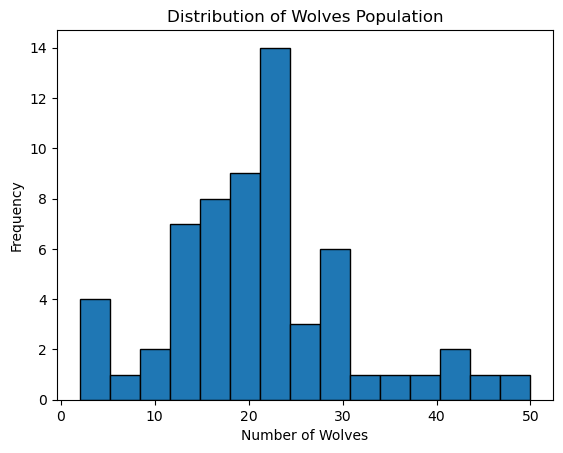

count    61.000000
mean     21.065574
std       9.998115
min       2.000000
25%      15.000000
50%      21.000000
75%      25.000000
max      50.000000
Name: wolves, dtype: float64


In [16]:
# Plot

plt.hist(wolf_moose_yearly['wolves'].dropna(), bins=15, edgecolor='black')
plt.title('Distribution of Wolves Population')
plt.xlabel('Number of Wolves')
plt.ylabel('Frequency')
plt.show()

# summary
wolves_summary = wolf_moose_yearly['wolves'].describe()
print(wolves_summary)

#### Numeric Variable

count    45.000000
mean     17.650956
std       5.736031
min       6.780000
25%      14.139000
50%      16.944000
75%      21.062000
max      33.246000
Name: snow.depth (cm), dtype: float64


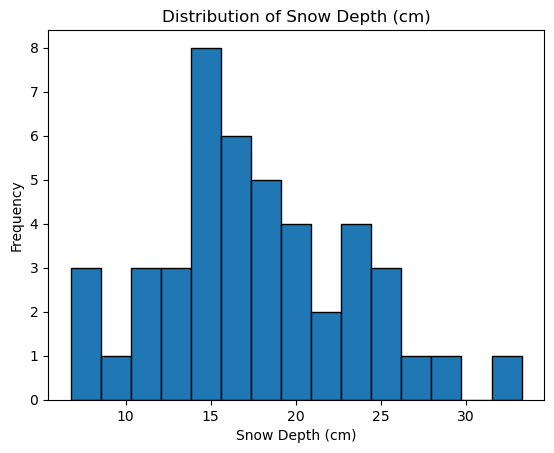

In [14]:
# Plot
plt.hist(wolf_moose_yearly['snow.depth (cm)'].dropna(), bins=15, edgecolor='black')
plt.title('Distribution of Snow Depth (cm)')
plt.xlabel('Snow Depth (cm)')
plt.ylabel('Frequency')


# Summary
snow_depth_summary = wolf_moose_yearly['snow.depth (cm)'].describe()
print(snow_depth_summary)

### Multivariate Exploration


**Task**: In this section, select pairs of variables of combination of types listed below and describe either the joint distributions or conditional distributions in which you condition on one of the variables. Include at least one plot and at least one numerical summary in your description.



#### Discrete-Discrete

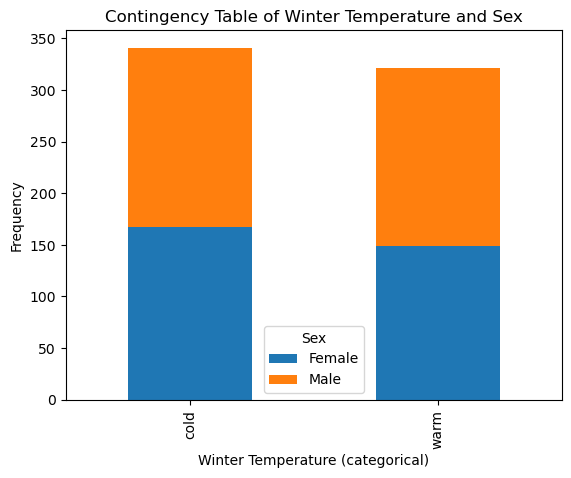

Sex                               Female  Male
Winter temperature (categorical)              
cold                                 167   174
warm                                 149   172


In [28]:
# Create a contingency table
contingency_table_winter_sex = pd.crosstab(moose_deaths['Winter temperature (categorical)'], moose_deaths['Sex'])

# Plot the contingency table
contingency_table_winter_sex.plot(kind='bar', stacked=True)
plt.title('Contingency Table of Winter Temperature and Sex')
plt.xlabel('Winter Temperature (categorical)')
plt.ylabel('Frequency')
plt.legend(title='Sex')
plt.show()

# Print the contingency table
print(contingency_table_winter_sex)


#### Discrete-Numeric

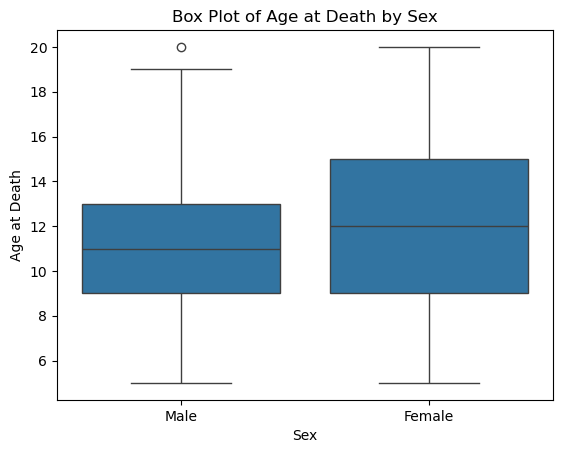

        count       mean       std  min  25%   50%   75%   max
Sex                                                           
Female  316.0  12.018987  3.768662  5.0  9.0  12.0  15.0  20.0
Male    346.0  10.641618  3.068097  5.0  9.0  11.0  13.0  20.0


In [27]:

# Plot
sb.boxplot(x='Sex', y='Age at death', data=moose_deaths)
plt.title('Box Plot of Age at Death by Sex')
plt.xlabel('Sex')
plt.ylabel('Age at Death')
plt.show()

# Summary
age_at_death_by_sex = moose_deaths.groupby('Sex')['Age at death'].describe()
print(age_at_death_by_sex)

#### Numeric-Numeric

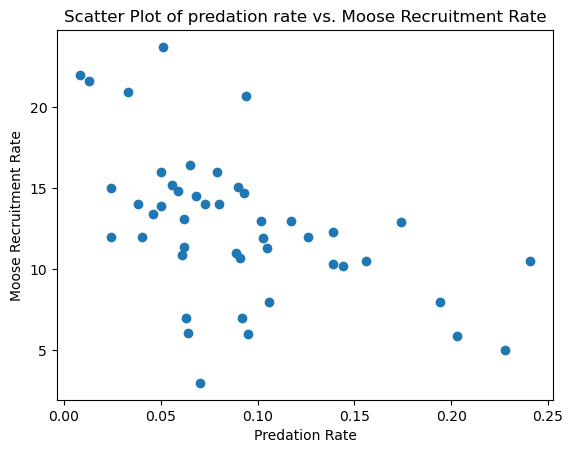

Correlation coefficient between predation rate and moose recruitment rate: -0.5098008957622947


In [24]:
# Scatter plot
plt.scatter(wolf_moose_yearly['predation rate'], wolf_moose_yearly['moose recruitment rate'])
plt.title('Scatter Plot of predation rate vs. Moose Recruitment Rate')
plt.xlabel('Predation Rate')
plt.ylabel('Moose Recruitment Rate')
plt.show()

# Correlation coefficient
correlation = wolf_moose_yearly['predation rate'].corr(wolf_moose_yearly['moose recruitment rate'])
print(f"Correlation coefficient between predation rate and moose recruitment rate: {correlation}")

### Summary

**Task**: Based on your exploration of these data, write up a paragraph of your findings. What are the key features of the data? What relationships do you see between the variables? What variables might be related to the populations of wolves and moose on Isle Royale? Consider how these questions can be answered in the next section when we perform inference.

## Winter Temperature and Sex:

The first chart shows that the distribution between males and females is fairly even across both temperature conditions. This suggests that the sex distribution remains balanced regardless of winter temperature conditions, which could indicate that external temperature factors do not selectively affect the survival or presence of one sex over the other in these populations.

## Age at Death by Sex:

The box plot of age at death by sex reveals that there female live longer than male on average. And female age at death varies a little bit larger than that of male. 

## Predation Rate vs. Moose Recruitment Rate:

The scatter plot indicates a negative correlation between predation rate and moose recruitment rate. As predation rate increases, moose recruitment rate tends to decrease. It suggests that higher predation pressure from wolves limit the growth of the moose population. 

## Inference

In this section we will perform inference: make guesses about populations or future data based on our sample data.

### Population and Sampling

**Task**: Describe the population of interest in this study. What is the population you are trying to make inferences about? What is the sample in this study? What is the relationship between the population and the sample? You may consider hypothetical populations or data generating processes if you find those more natural to articulate.

The population of interest in this study is the populations of wolves and moose on Isle Royale, an island in Lake Superior. Population refers to all individuals of wolves, moose, and other things such as temperature, NAo, snowdepth, etc, on the island that are subject to the study variables.

The sample is a small portion of population, it represents a selected subset of the broader populations of wolves and moose, collected during specific intervals and under particular conditions. This sample is instrumental for deriving broader inferences about the population dynamics on Isle Royale. Through our analysis of this data, we aim to identify trends, traits, and relationships among the variables, which can provide insights into the ecological interactions and challenges on the island. These insights are crucial for developing informed conservation and management strategies to support the wildlife of Isle Royale.

### Hypothesis Testing

#### Theory

**Task**: give a theory you would like to test about the population you identified in the previous section. Explain how you can use the format of a hypothesis to test that theory. Clearly describe the population parameter, parameter space, null hypothesis, and alternative hypothesis you will use to test this theory.

```markdown

#### Theory

Whether the mean age at death of moose differs between males and females on Isle Royale. 

**Population Parameter**: Mean age at death of moose
**Parameter Space**: The set of all possible values for the mean age at death of moose for males and females
**Null Hypothesis (H0)**: The mean age at death of male moose is equal to the mean age at death of female moose. (μ_male = μ_female)
**Alternative Hypothesis (H1)**: The mean age at death of male moose is not equal to the mean age at death of female moose. (μ_male ≠ μ_female)

We can use a two-sample t-test to compare the means of the two groups. The test will determine if there is a statistically significant difference between the mean ages at death of male and female moose.
```

#### Application

**Task**: Select a tolerance for Type I error ($\alpha$-level). Perform the hypothesis test you described in the previous section. Report the results of the test using either a rejection region or a p-value. Do you reject the null hypothesis? What is your conclusion about the theory you tested?

In [29]:

age_at_death_male = moose_deaths[moose_deaths['Sex'] == 'Male']['Age at death']
age_at_death_female = moose_deaths[moose_deaths['Sex'] == 'Female']['Age at death']


t_stat, p_value, df = sm.stats.ttest_ind(age_at_death_male, age_at_death_female)


print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the mean age at death between male and female moose.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the mean age at death between male and female moose.")


T-statistic: -5.175180218446346
P-value: 3.0252362239003225e-07
Reject the null hypothesis: There is a significant difference in the mean age at death between male and female moose.


### Confidence Interval

#### Theory

**Task**: Identify a different population parameter than the one you used in the previous section. Explain how you can use the format of a confidence interval to make inferences about this population parameter. Clearly describe the population parameter, confidence level, and confidence interval you will use to make inferences about this population parameter.

```markdown
### Theory

**Population Parameter**: Mean age of moose excluding calves on Isle Royale.

**Confidence Level**: 95%

**Confidence Interval**: A confidence interval provides a range of values within which the true population parameter is expected to lie with a certain level of confidence. For the mean age of moose excluding calves, we calculate the 95% confidence interval. This interval estimates the range within which the true mean age of moose on Isle Royale is likely to fall, based on our sample data.

To calculate the confidence interval, we use the sample mean and standard deviation of the moose ages, and the critical value from the t-distribution. The formula for the confidence interval is:

```
CI = x̄ ± t(α/2, n-1) * (s/√n)
```

where:

- `x̄` is the sample mean of moose ages.
- `t(α/2, n-1)` is the critical value from the t-distribution with `n-1` degrees of freedom.
- `s` is the sample standard deviation of moose ages.
- `n` is the sample size, reflecting the number of moose ages recorded excluding calves.



```

#### Application

**Task**: Select a confidence level for your confidence interval. Compute the confidence interval for the population parameter you identified in the previous section. Report the results of the confidence interval. What is your conclusion about the population parameter you are making inferences about? What does this tell you about wolves and moose on Isle Royale?

In [ ]:
import scipy.stats as stats

# Sample mean and standard deviation
moose_age_stats = wolf_moose_yearly['moose mean age excluding calves'].describe()
mean_moose_age = moose_age_stats['mean']
std_moose_age = moose_age_stats['std']
n = moose_age_stats['count']

# Confidence level
confidence_level = 0.95

# Calculate the t-critical value
t_critical = stats.t.ppf((1 + confidence_level) / 2, df=n-1)

# Calculate the margin of error
margin_of_error = t_critical * (std_moose_age / np.sqrt(n))

# Calculate the confidence interval
confidence_interval = (mean_moose_age - margin_of_error, mean_moose_age + margin_of_error)

print(f"95% Confidence Interval for the mean age of moose excluding calves: {confidence_interval}")



95% Confidence Interval for the mean age of moose excluding calves: (6.105564568932999, 6.8805578800465925)


95% confidence interval for the mean age of moose excluding calves on Isle Royale to be between approximately 6.11 and 6.88 years. This result helps in understanding the age distribution and potential longevity of the moose population on the island, excluding the younger calves.

Conclusion about the Population Parameter:
The mean age of approximately 6.5 years suggests that the moose population has a relatively middle-aged demographic, indicating that many moose are surviving to a moderately mature age but not necessarily reaching very old age in the whole population. This can be due to several factors, such as natural predation, environmental conditions, and available resources.


### Regression

#### Theory

Linear regression is a statistical method that models the relationship between the conditional mean of an outcome and one or more predictors as a linear function:

$$E(Y \mid x_1, x_2, \ldots ) = a + b_1 x_1 + b_2 x_2 + \ldots $$

**Task**: Identify an outcome and two or more predictors you think may be related to the conditional mean of the outcome. Explain how you can use linear regression to model the relationship between the outcome and the predictors. Explain how linear regression can be used to test theories about the relationships between the outcome and the predictors; in particular comment on what it would mean if $b = 0$ for each of the predictors in the model.

### Regression

**Outcome**: Moose population (`moose`)

**Predictors**: 
1. Wolf population (`wolves`)
2. Predation rate (`predation rate`)
3. Snow depth (`snow.depth (cm)`)

The model can be written as:
```
moose = a + b1 * wolves + b2 * predation rate + b3 * snow.depth (cm) + epsilon
```

Where:
- `a` is the intercept.
- `b1, b2, b3` are the coefficients for the predictors.
- `epsilon` is the error term.

**Testing Theories**:
- If `b1 = 0`, it means that the wolf population has no effect on the moose population.
- If `b2 = 0`, it means that the predation rate has no effect on the moose population.
- If `b3 = 0`, it means that the snow depth has no effect on the moose population.



#### Application

**Task**: Fit a linear regression model to the data. Report the results of the model. What are the coefficients of the model? What is the interpretation of the coefficients? Given either confidence intervals or hypothesis tests to test if $b = 0$ for each coefficient. What do you conclude about the relationships between the predictors and the outcome based on those intervals/tests? What is the $R^2$ of the model? What is the interpretation of the $R^2$?

In [ ]:

X = wolf_moose_yearly[['wolves', 'predation rate', 'snow.depth (cm)']].dropna()
y = wolf_moose_yearly.loc[X.index, 'moose']

# Add a constant to the predictors
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  moose   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     8.134
Date:                Fri, 13 Dec 2024   Prob (F-statistic):           0.000229
Time:                        23:06:26   Log-Likelihood:                -326.63
No. Observations:                  45   AIC:                             661.3
Df Residuals:                      41   BIC:                             668.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1173.6364    203.819     

Model Coefficients and Significance
Intercept: The model intercept is 1173.64, suggesting the expected moose population when all predictors are zero.

Wolf Population: The coefficient is 1.39, indicating a slight increase in moose population per additional wolf. But this effect is not statistically significant (p = 0.820).

Predation Rate: Each unit increase in the predation rate decreases the moose population by 4589.36, a significant effect (p = 0.001).

Snow Depth: Each centimeter increase in snow depth corresponds to an increase of 15.17 in moose population, but this relationship is not significant (p = 0.116).

Model Goodness of Fit
R-squared (R²): 0.373, suggesting that about 37.3% of the variability in the moose population is explained by the model. This indicates moderate explanatory power, but also highlights the presence of other unaccounted factors.


### Classification

#### Theory

**Task**: Select a different outcome than the previous section that would be appropriate to use with a classification technique and predictors your think may be related to the outcome. Select a classification technique that you think would be appropriate for this data. Explain how you can use classification to model the relationship between the outcome and the predictors. Explain how classification can be used to test theories about the relationships between the outcome and the predictors. Be sure to explain how either training-test sets or cross-validation can be used to evaluate the accuracy of the model.

Outcome and Predictors:

Outcome: Kill rate categorized as 'high' or 'low' based on the median.
Predictors: Temperatures from three time periods during the year.
Logistic Regression: This method models the probability of observing a 'high' kill rate based on temperature, estimating the impact of each predictor on the odds of higher kill rates.

Theory Testing: Logistic regression tests hypotheses about the effect of wolves numbers, May-Aug preticipation, moose mean age excluding calves, and moose recruitment rate, providing empirical support or refutation for theoretical predictions.

Model Evaluation:

Training-Test Split: Assesses model accuracy on unseen data, avoiding overfitting.
Cross-Validation: Ensures robustness by averaging performance across multiple subsets of the data.

#### Application

**Task**: Use the classification technique you selected to model the relationship between the outcome and the predictors. Report the results of the model. Use the model to predict some interesting cases. Use either a training-test set split or cross validation to assess the accuracy of the classifier. If the classifier has tuning parameters, try several values of the tuning parameters to see how they affect the accuracy of the classifier. 

In [52]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Convert kill rate to binary classification (high: 1, low: 0)
wolf_moose_yearly['kill_rate_binary'] = (wolf_moose_yearly['kill rate'] > wolf_moose_yearly['kill rate'].median()).astype(int)

# Select predictors and outcome
X_classification = wolf_moose_yearly[['wolves', 'May-Aug (precip, inches)', 'moose mean age excluding calves','moose recruitment rate']].dropna()
y_classification = wolf_moose_yearly.loc[X_classification.index, 'kill_rate_binary']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

# Initialize and fit the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Cross-validation
cv_scores = cross_val_score(log_reg, X_classification, y_classification, cv=5)
print(f"\nCross-Validation Accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")

Confusion Matrix:
[[5 1]
 [1 3]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.75      0.75      0.75         4

    accuracy                           0.80        10
   macro avg       0.79      0.79      0.79        10
weighted avg       0.80      0.80      0.80        10


Cross-Validation Accuracy: 0.87 ± 0.18


Model Evaluation Results:

Confusion Matrix: The model produced a matrix of [[5, 1], [1, 3]].

Classification Report:
Precision for low kill rate (class 0): 83%
Precision for high kill rate (class 1): 75%

Recall for both classes is 83% for class 0 and 75% for class 1, leading to an overall accuracy of 80%.

Cross-Validation Accuracy: The average accuracy from cross-validation is 87%, with a standard deviation of 18%, indicating that the model performs reliably across different subsets of the data.
The results suggest that the model performs adequately well with an accuracy of 80% on the test set and 87% in cross-validation, showing some consistency in predictive power.

## Conclusion

**Task**: Write a conclusion to your analysis. Summarize the key findings of your analysis. What relationships did you find between the variables in the data? What inferences did you make about the populations of wolves and moose on Isle Royale? What theories did you test? What conclusions did you draw from those tests? What predictions did you make about the data? What conclusions did you draw from those predictions? What suggestions do you have for future data collection Isle Royale? What else would you like to learn about the populations of wolves and moose?

The logistic regression analysis has uncovered significant correlations between the binary classification of kill rate—differentiating between high and low—and several key predictors. These include the number of wolves, precipitation levels from May to August, the average age of moose (excluding calves), and the moose recruitment rate. The model has proven to be reasonably accurate in forecasting whether kill rates will be high or low, with an impressive 80% accuracy rate in the test set and an average cross-validation accuracy of 87%.

### Insights and Theoretical Support
The findings from the analysis imply that the dynamics of predator-prey interactions, in this case between wolves and moose, are influenced by more than just the predator's numbers. Environmental conditions, such as precipitation, and demographic traits of the prey, like age and recruitment rate, also play a crucial role. This aligns with ecological theories that emphasize the multifaceted nature of these interactions, where factors beyond predator-prey numbers shape the outcomes.

### Implications and Final Thoughts
The model's predictions suggest that fluctuations in any of these variables could dramatically alter the predator-prey relationship on Isle Royale. For instance, a younger moose population or increased precipitation might be associated with reduced kill rates, possibly because these conditions create a more favorable environment for moose survival and reproduction.

### Suggestions for Future Data Collection
More detailed environmental monitoring (e.g., seasonal temperature changes, precipitation levels).
Comprehensive demographic data on moose and wolves, including health metrics and genetic diversity.
Longitudinal data to track changes over time and assess the impact of climate change.

### Areas for Further Exploration
Further studies could delve into the genetic diversity within the Isle Royale wolf and moose populations to understand the effects of inbreeding. It would also be insightful to examine how additional ecological factors, such as disease outbreaks and competition with other species, influence the complex dynamics between wolves and moose. This comprehensive approach could provide a more nuanced understanding of the ecological interplay on Isle Royale and beyond.


## GenAI Appendix

### Template

Please copy this template and use it to indicate how you used GenAI tools in each section of the project.

* Section Title:
* Description of Use/Prompt:
* Output from GenAI Tool:

Example:

* Section Title: Univariate Exploration, Discrete Variable
* Description of Use/Prompt: I used ChatGPT to help me write a description of the distribution of the discrete variable.
* Output from GenAI Tool: The discrete variable is a categorical variable that represents different categories. The distribution of the discrete variable shows that the categories are not evenly distributed. Some categories have a higher frequency than others. The most common category is category 1, which occurs in 30% of the observations. The least common category is category 3, which occurs in 10% of the observations.

## GenAI Appendix

### Template

* Section Title: Theories part
* Description of Use/Prompt: I told chatgpt to write confidence interval equation that can be put into markdown. Prompt: "please convert those hypothesis and equations into mathmathetical functions that can be illustrate well in vscode"
* Output from GenAI Tool: confidence interval, for example: CI = x̄ ± t(α/2, n-1) * (s/√n)


### Template

* Section Title: contingency table of winter temperature and sex
* Description of Use/Prompt: I told chatgpt to help me to build a template of how to output a stacked bar graph
* Output from GenAI Tool: a stacked bar graph of relationship of winter temperature and sex for moose. 
